## groupby

In [8]:
import pandas as pd
import numpy as np

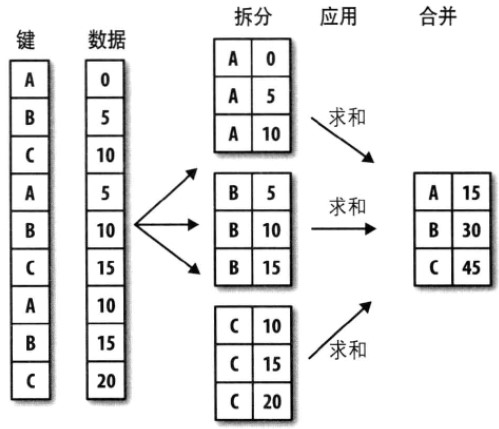

In [6]:
from IPython.display import Image
Image(filename="C:/Users/zty/Desktop/groupby.jpg",width=300,height=400)

In [10]:
df = pd.DataFrame({"key1":["a","a","b","b","a"],"key2":["one","two","one","two","one"],
                   "data1":np.random.randn(5),"data2":np.random.randn(5)})
df["data1"].groupby([df["key1"],df["key2"]]).mean()

key1  key2
a     one     0.308932
      two     1.118340
b     one     1.476392
      two    -0.602340
Name: data1, dtype: float64

## 对分组进行迭代

In [12]:
for (k1,k2),group in df.groupby(["key1","key2"]):
    print(k1,k2)
    print("----")
    print(group)

a one
----
      data1     data2 key1 key2
0 -0.742927  0.124212    a  one
4  1.360790  0.410103    a  one
a two
----
     data1     data2 key1 key2
1  1.11834  0.220481    a  two
b one
----
      data1     data2 key1 key2
2  1.476392 -1.750662    b  one
b two
----
     data1     data2 key1 key2
3 -0.60234  0.616658    b  two


## agg:对分组数据进行多种运算

In [14]:
df["data1"].groupby([df["key1"],df["key2"]]).agg([np.mean,np.std,np.sum])

mean       std       sum
key1 key2                              
a    one   0.308932  1.487552  0.617863
     two   1.118340       NaN  1.118340
b    one   1.476392       NaN  1.476392
     two  -0.602340       NaN -0.602340

### 以无索引形式返回聚合数据

In [18]:
df.groupby([df["key1"],df["key2"]],as_index=False).mean()

,key1,key2,data1,data2
0,a,one,0.308932,0.267157
1,a,two,1.118340,0.220481
2,b,one,1.476392,-1.750662
3,b,two,-0.602340,0.616658


### apply
apply()：沿着DataFrame某行或某列应用函数（配合lambda使用）
>df.apply(lambda x:x!=x[0],axis=1)

applymap()：对DataFrame每个元素进行函数应用
>df[[“销售”,”人员数量”]].applymap(lambda x:”%.2f” %x)

map()：对Series每个元素进行函数应用
>df[“销售”].map(lambda x:”%.2f” %x)

### 分位数和桶分析
cut(x, bins, right=True, labels=None)
>等距切割

qcut(x, q, labels=None)
>等比例切割（也可以自行制定分割比例）

### pandas广播
默认在行上广播
>DataFrame和Series间的算术运算会将Series的索引匹配到DataFrame的列上

如果匹配行且在列上广播
>则必须使用算术运算方法（add sub mul div）

示例：

在行上进行广播 
>frame-series

在列上进行广播  
>frame.sub(series1,axis=0)

In [19]:
test_df = pd.DataFrame(np.arange(9).reshape(3,3),columns=["a","b","c"])
test_df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [29]:
mean = [3,4,5]
test_df - mean

,a,b,c
0,-3,-3,-3
1,0,0,0
2,3,3,3


In [30]:
test_df.sub(mean,axis=0)

,a,b,c
0,-3,-2,-1
1,-1,0,1
2,1,2,3
